<a href="https://colab.research.google.com/github/udaykiranreddykondreddy/tfug_coimbatore_may_webinar/blob/master/autoencoders_image_colorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://drive.google.com/uc?export=view&id=1vG1zdxXrp7Yp5naC8PgMl5UlpXXjou9Z" height="500"/>

**<h3>What is Autoencoder??</h3>**

- It is an unsupervised learning neural network
- It tries to ReGenerate the input
- It has 2 components Encoder and Decoder




<img src="http://drive.google.com/uc?export=view&id=1UuRc-yEc-YGAlEa8RHqp3V2z3-uANlpA" height="500"/>

**<h3>What is Encoder??</h3>**

- Aim of encoder is to compress the data
- It tries to find the function that maps input data (X) to compressed data (H)
\begin{equation} H  = f(X) \end{equation}


<img src="http://drive.google.com/uc?export=view&id=1QHtS0GxdfbGf3GId-4PjK_YhElF7PljE" height="500"/>

**<h3>What is Latent Vector??</h3>**

 - It is a learned representation of input data in a low dimension space. 


<img src="http://drive.google.com/uc?export=view&id=1qTkQx76aBJNhsk3ITrUBEfDQzDQtzMc0" height="500"/>


**<h3>What is Decoder??</h3>**

- It tries to reconstruct the input from latent vector
- It also try to find the function that maps the latent vector to reconstructed data
\begin{equation} \hat{{X}}  = g(H) \end{equation}

<img src="http://drive.google.com/uc?export=view&id=1kHLR8RgP2Ci8u0LGz5pHlhxBbz7n0E_y" height="500"/>


- So final equation can be written as 
\begin{equation} \hat{{X}}  = g(f(X)) \end{equation}

<img src="http://drive.google.com/uc?export=view&id=15zm2U3EaH4UkKm04GXB_sSZGaUPevBgz" height="500"/>

**<h3>Calculating Loss</h3>**

- We want to improve our model right??
- So we calcuate the loss and then based on the loss we update the weights using backpropagation.
- This loss is called as reconstruction error.
- Mostly we use Squared error. 
\begin{equation} Loss(X,\hat{{X}})  = || X - \hat{{X}} ||^{{2}} \end{equation}

**<h3>Applications of Autoencoders</h3>**

- Dimensionality reduction
- Anomaly/outlier detection
- Denoising 
- word embeddings
- Sequence to sequence prediction
  - predict the next frame of a video
  - generate fake videos
- Recommendation system
- Feature Extraction
- Image generation
  - generate new characters of animation
  - generate fake human images
- Image Compression
- Image Reconstruction
- latent space clustering

**<h3>Types</h3>**

- Sparse autoencoder
- Autoencoder
- Convolutional autoencoder
- Denoising
- Sequence-to-sequence autoencoder
- Variational autoenoder

**```
Lets understand this with an example (Image reconstruction)
```**

**<h3> Deep AutoEncoder </h3>**

In [0]:
# Importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
from keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model

In [0]:
# Load dataset 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert to float32.
x_train, x_test = x_train.astype(np.float32), x_test.astype(np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

In [0]:
# input placeholder
input_img = tf.keras.layers.Input(shape=(784,), name = "input")

# this is the encoded representation of the input
encoded = tf.keras.layers.Dense(128, activation='relu', name="emb_1")(input_img)
encoded = tf.keras.layers.Dense(64, activation='relu', name="emb_2")(encoded)
encoded = tf.keras.layers.Dense(32, activation='relu', name="emb_3")(encoded)
latent_vector = tf.keras.layers.Dense(16, activation='relu', name="emb_4")(encoded)
#latent_vector = tf.keras.layers.Dense(2, activation='relu', name="latent_vector")(encoded)

In [0]:
# this is the loss reconstruction of the input
#decoded = tf.keras.layers.Dense(16, activation='relu', name="dec_1")(latent_vector)
decoded = tf.keras.layers.Dense(32, activation='relu', name="dec_2")(latent_vector)
decoded = tf.keras.layers.Dense(64, activation='relu', name="dec_3")(decoded)
decoded = tf.keras.layers.Dense(128, activation='relu', name="dec_4")(decoded)
output_layer = tf.keras.layers.Dense(784, activation = 'sigmoid', name="output")(decoded)


In [0]:
# this model maps an input to its recommendation
autoencoder = tf.keras.models.Model(input_img, output_layer)

In [0]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
emb_1 (Dense)                (None, 128)               100480    
_________________________________________________________________
emb_2 (Dense)                (None, 64)                8256      
_________________________________________________________________
emb_3 (Dense)                (None, 32)                2080      
_________________________________________________________________
emb_4 (Dense)                (None, 16)                528       
_________________________________________________________________
dec_2 (Dense)                (None, 32)                544       
_________________________________________________________________
dec_3 (Dense)                (None, 64)                2112

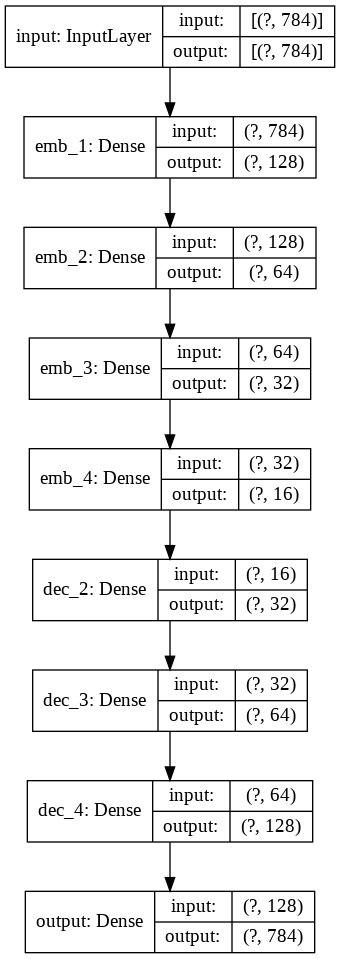

In [0]:
plot_model(autoencoder, to_file='autoencoder-1.png', show_shapes=True)

In [0]:
# Now let's train our autoencoder to reconstruct MNIST digits
autoencoder.compile(optimizer='adam', loss='mse')

In [0]:

# now let's train our autoencoder for 100 epochs
autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0748 - val_loss: 0.0529
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0439 - val_loss: 0.0375
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0339 - val_loss: 0.0308
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0292 - val_loss: 0.0274
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0268 - val_loss: 0.0255
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0250 - val_loss: 0.0240
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0238 - val_loss: 0.0227
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0225 - val_loss: 0.0217
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0217 - val_loss: 0.0209
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0210 - val_lo

In [0]:
#encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

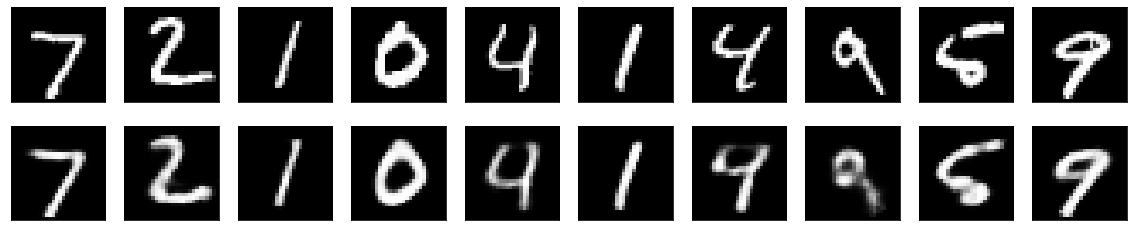

In [0]:

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

**<h2> Dimensionality reduction with Autoencoders </h2>**

In [0]:
# input placeholder
input_img = tf.keras.layers.Input(shape=(784,), name = "input")

# this is the encoded representation of the input
encoded = tf.keras.layers.Dense(128, activation='relu', name="emb_1")(input_img)
encoded = tf.keras.layers.Dense(64, activation='relu', name="emb_2")(encoded)
encoded = tf.keras.layers.Dense(32, activation='relu', name="emb_3")(encoded)
encoded = tf.keras.layers.Dense(16, activation='relu', name="emb_4")(encoded)
latent_vector = tf.keras.layers.Dense(2, activation='relu', name="latent_vector")(encoded)

# this is the loss reconstruction of the input
decoded = tf.keras.layers.Dense(16, activation='relu', name="dec_1")(latent_vector)
decoded = tf.keras.layers.Dense(32, activation='relu', name="dec_2")(decoded)
decoded = tf.keras.layers.Dense(64, activation='relu', name="dec_3")(decoded)
decoded = tf.keras.layers.Dense(128, activation='relu', name="dec_4")(decoded)
output_layer = tf.keras.layers.Dense(784, activation = 'sigmoid', name="output")(decoded)
# this model maps an input to its recommendation
autoencoder = tf.keras.models.Model(input_img, output_layer)

# Now let's train our autoencoder to reconstruct MNIST digits
autoencoder.compile(optimizer='adam', loss='mse')
# now let's train our autoencoder for 100 epochs
autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0821 - val_loss: 0.0651
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0634 - val_loss: 0.0626
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0613 - val_loss: 0.0605
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0602 - val_loss: 0.0601
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0596 - val_loss: 0.0588
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0582 - val_loss: 0.0577
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0569 - val_loss: 0.0561
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0551 - val_loss: 0.0544
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0538 - val_loss: 0.0532
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0528 - val_lo

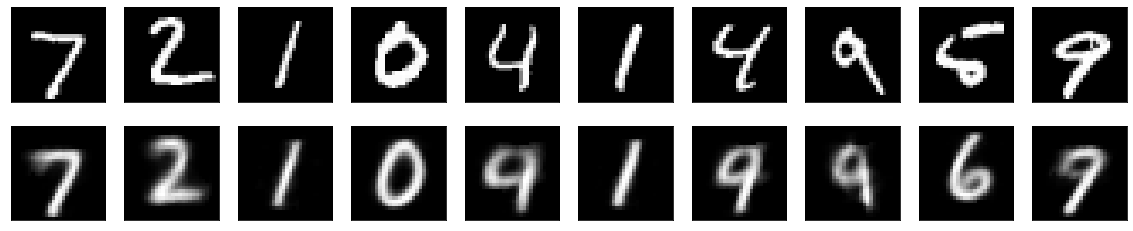

In [0]:
#encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [0]:
# let's also create a seprate encoder model
# this mode maps an input to its encoded representation
encoder = tf.keras.models.Model(input_img, latent_vector)
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
emb_1 (Dense)                (None, 128)               100480    
_________________________________________________________________
emb_2 (Dense)                (None, 64)                8256      
_________________________________________________________________
emb_3 (Dense)                (None, 32)                2080      
_________________________________________________________________
emb_4 (Dense)                (None, 16)                528       
_________________________________________________________________
latent_vector (Dense)        (None, 2)                 34        
Total params: 111,378
Trainable params: 111,378
Non-trainable params: 0
_____________________________________________________

In [0]:
# Dimensionality reduction with PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_test)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
principalDf["label"] = y_test


In [0]:
pca.explained_variance_ratio_

array([0.10047699, 0.07544516], dtype=float32)

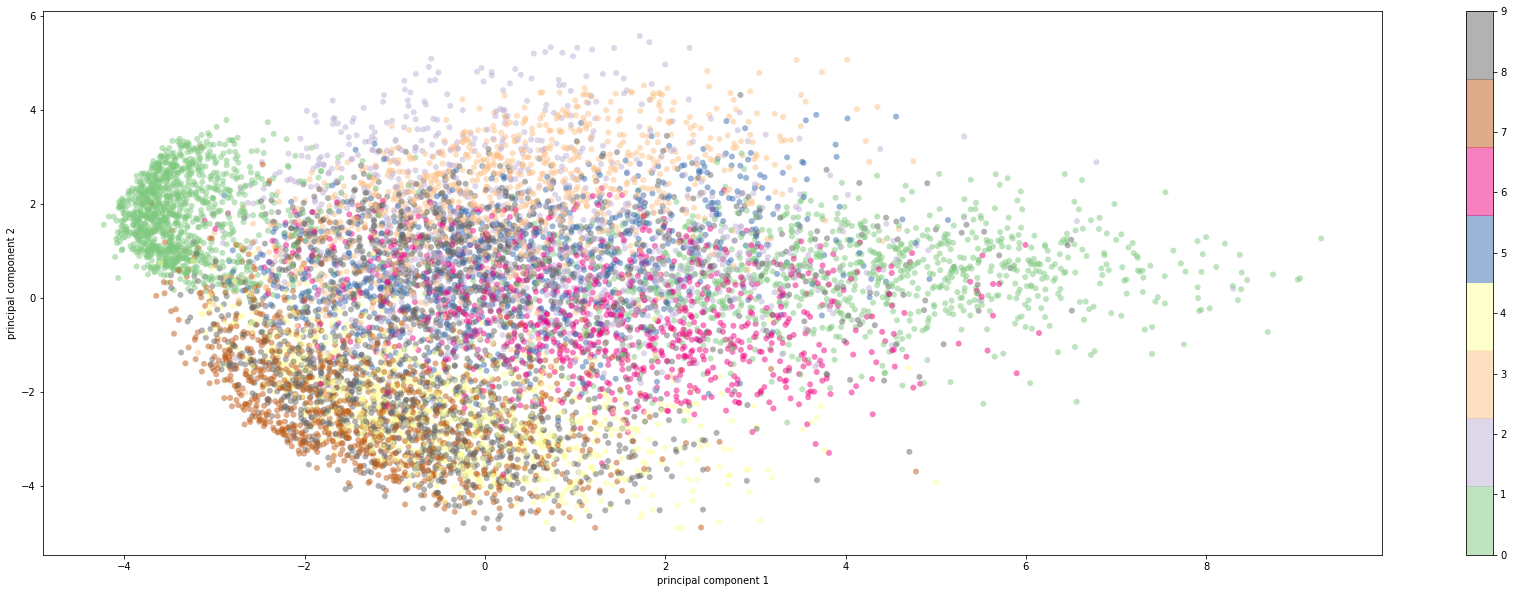

In [0]:
# Visualize
fig, ax = plt.subplots(figsize=(30,10))
plt.scatter(principalDf['principal component 1'], principalDf["principal component 2"],
            c=principalDf["label"], edgecolor='none', alpha=0.5,
            cmap="Accent")
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.colorbar();

In [0]:
# Dimentionality reduction with encoder vector using PCA
principalComponents = encoder.predict(x_test)

#ca = PCA(n_components=2)
#principalComponents = pca.fit_transform(encoded_imgs)
principalDf = pd.DataFrame(data = list(principalComponents),columns = ['principal component 1', 'principal component 2'])
principalDf["label"] = y_test


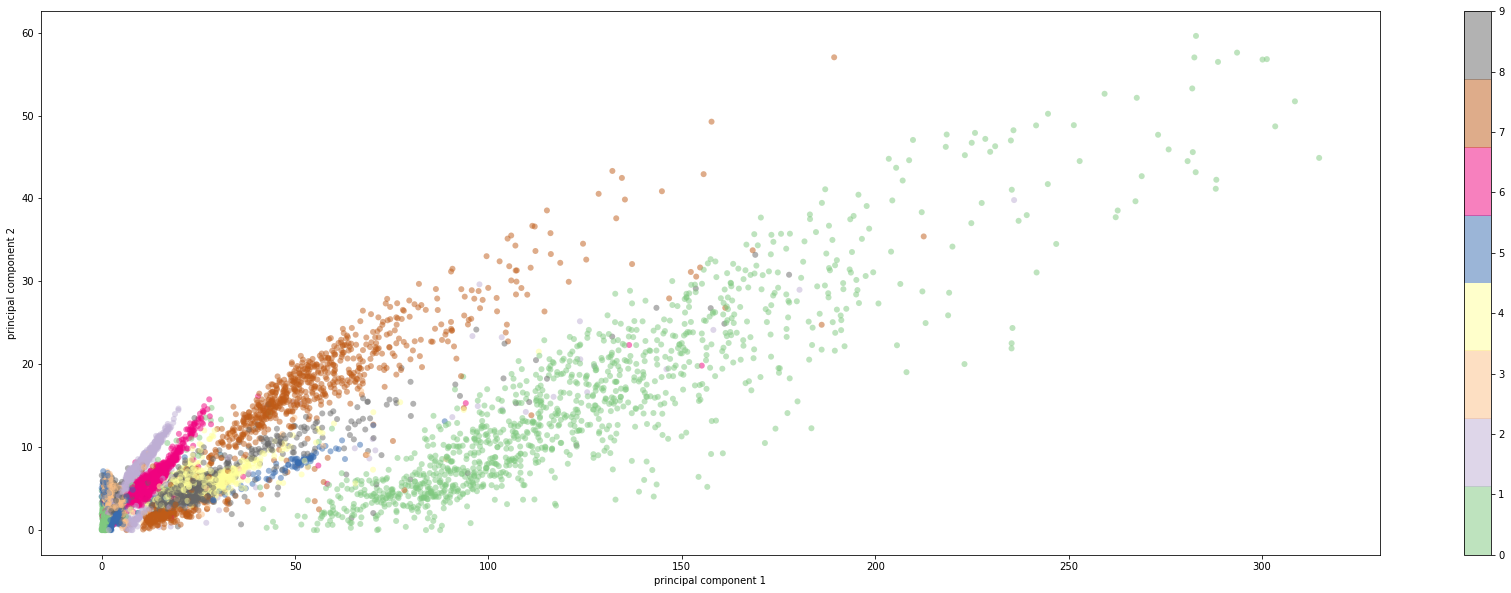

In [0]:
# Visualize
fig, ax = plt.subplots(figsize=(30,10))
plt.scatter(principalDf['principal component 1'], principalDf["principal component 2"],
            c=principalDf["label"], edgecolor='none', alpha=0.5,
            cmap="Accent")
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.colorbar();

**<h3>Convolutional autoencoder</h3>**

<img src="https://miro.medium.com/max/1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" height="250"/>


**Kernel operation**

<img src="https://miro.medium.com/max/1000/1*GcI7G-JLAQiEoCON7xFbhg.gif" height="250"/>


**Pooling layer**

<img src="https://miro.medium.com/max/792/1*uoWYsCV5vBU8SHFPAPao-w.gif" height="250"/>


In [0]:
# Data

# Load dataset 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert to float32.
x_train, x_test = x_train.astype(np.float32), x_test.astype(np.float32)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [0]:
# Building encoder

input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)


In [0]:

# Building decoder 

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [0]:
# Building Autoencoder

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0   

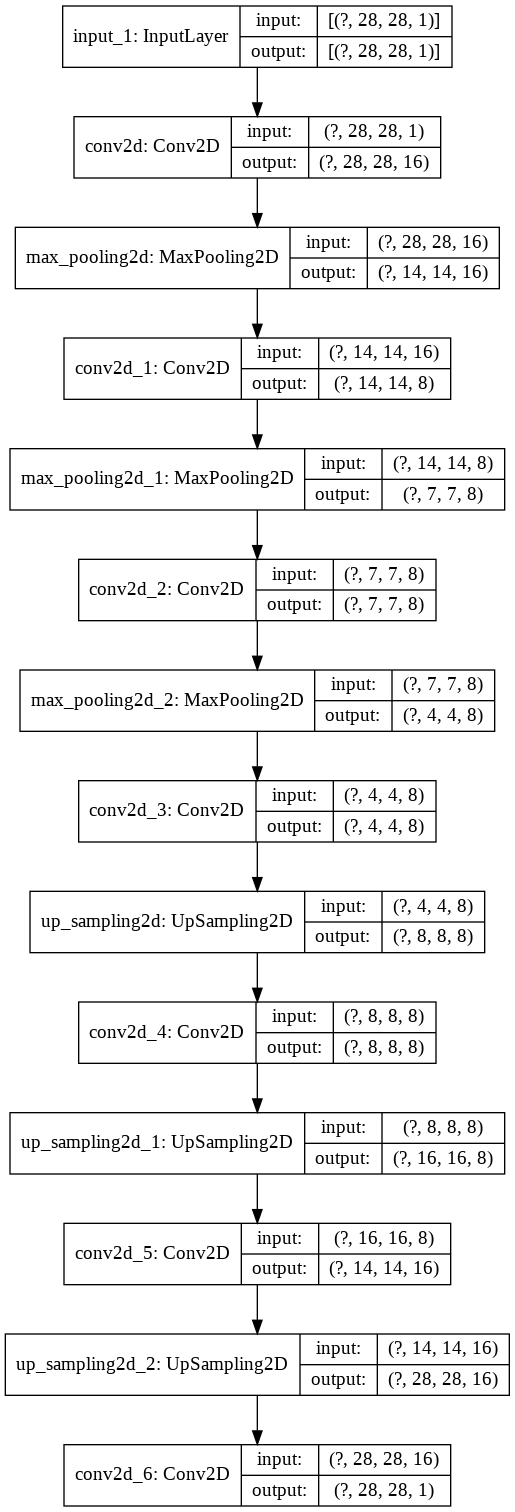

In [0]:
plot_model(autoencoder, to_file='autoencoder-2.png', show_shapes=True)

In [0]:
# Train the model
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
469/469 [==============================] - 3s 7ms/step - loss: 0.7050 - val_loss: 0.7024
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.7000 - val_loss: 0.6976
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6953 - val_loss: 0.6931
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6906 - val_loss: 0.6881
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6850 - val_loss: 0.6815
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6767 - val_loss: 0.6710
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6611 - val_loss: 0.6481
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6211 - val_loss: 0.5840
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5241 - val_loss: 0.4734
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4527 - val_lo

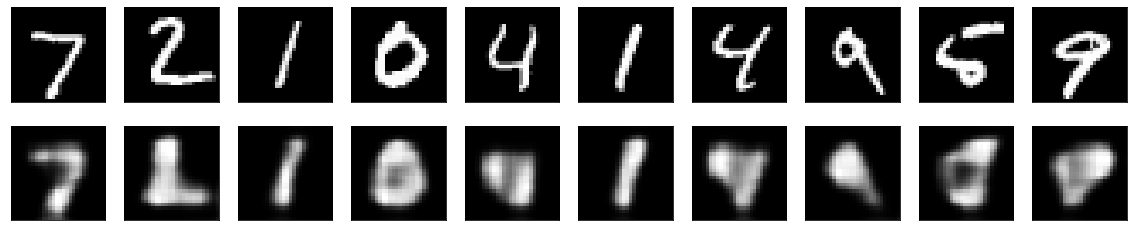

In [0]:
# Visualize 
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
# let's also create a seprate encoder model
# this mode maps an input to its encoded representation
encoder = tf.keras.models.Model(input_img, encoded)
encoder.summary()

encoded_imgs = encoder.predict(x_test)


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0   

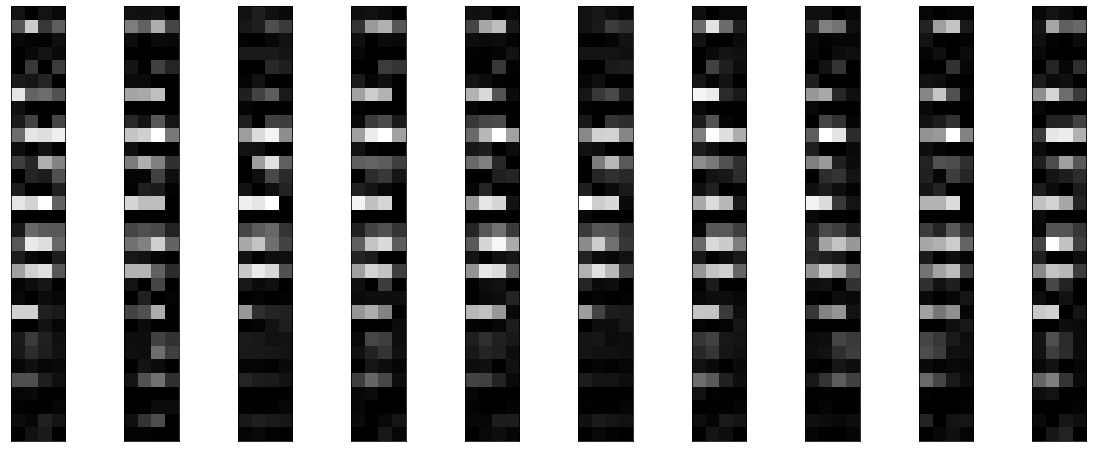

In [0]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):

    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**<h2> Image denoising </h2>**

In [0]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

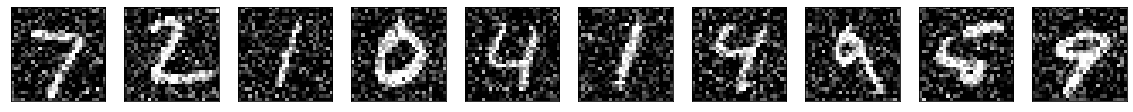

In [0]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
# Building encoder

input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# Building decoder 

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train, epochs=200, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/200
469/469 [==============================] - 3s 7ms/step - loss: 0.6770 - val_loss: 0.6712
Epoch 2/200
469/469 [==============================] - 3s 6ms/step - loss: 0.6612 - val_loss: 0.6483
Epoch 3/200
469/469 [==============================] - 3s 6ms/step - loss: 0.6241 - val_loss: 0.5930
Epoch 4/200
469/469 [==============================] - 3s 6ms/step - loss: 0.5506 - val_loss: 0.5180
Epoch 5/200
469/469 [==============================] - 3s 6ms/step - loss: 0.5031 - val_loss: 0.5010
Epoch 6/200
469/469 [==============================] - 3s 6ms/step - loss: 0.4941 - val_loss: 0.4959
Epoch 7/200
469/469 [==============================] - 3s 6ms/step - loss: 0.4893 - val_loss: 0.4914
Epoch 8/200
469/469 [==============================] - 3s 6ms/step - loss: 0.4849 - val_loss: 0.4871
Epoch 9/200
469/469 [==============================] - 3s 6ms/step - loss: 0.4808 - val_loss: 0.4830
Epoch 10/200
469/469 [==============================] - 3s 6ms/step - loss: 0.4766 - val_lo

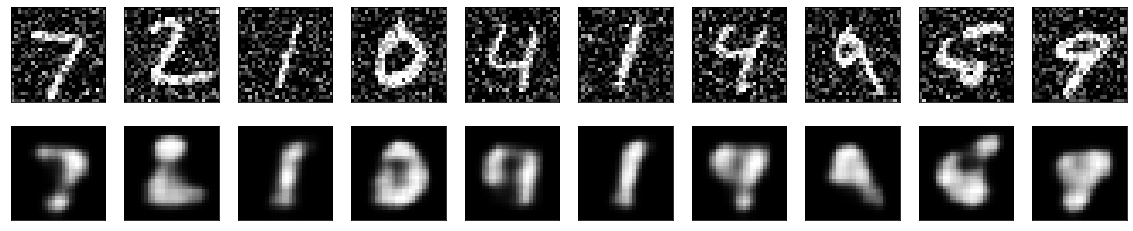

In [0]:
# Visualize 
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**<h1> Image colorization </h1>**

**<h3> Using Transferlearning with Inception resnet v2 </h3>**

<img src="https://miro.medium.com/max/1400/1*CYRgf1i1q_4hx5AcdcaSEg.jpeg" height="600" width="2000"/>

In [0]:
# upload your kaggle API token (you can get that from your account)
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
#Run this to create a kaggle environment
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
# Get data from kaggle 
import zipfile
# Download data
!kaggle datasets download -d thedownhill/art-images-drawings-painting-sculpture-engraving

# UnZip data

zip_ref = zipfile.ZipFile("art-images-drawings-painting-sculpture-engraving.zip", 'r')
zip_ref.extractall()

zip_ref.close()

 99% 578M/583M [00:09<00:00, 63.9MB/s]
100% 583M/583M [00:09<00:00, 62.2MB/s]


In [0]:
!ls

art-images-drawings-painting-sculpture-engraving.zip  dataset	   sample_data
autoencoder-1.png				      kaggle.json
autoencoder-2.png				      musemart


In [0]:
import os
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3
INPUT_SHAPE=(IMG_HEIGHT, IMG_WIDTH, 1)
TRAIN_PATH = 'dataset/dataset_updated/training_set/painting/'

train_ids = next(os.walk(TRAIN_PATH))[2]

In [0]:
%%time
import sys
from tqdm import tqdm
from skimage.transform import resize
X_train = np.zeros((len(train_ids)-86, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
missing_count = 0
print('Getting train images ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + id_+''
    #print(path)
    try:
        img = imread(path)
        img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
        X_train[n-missing_count] = img
    except:
#         print(" Problem with: "+path)
        missing_count += 1

X_train = X_train.astype('float32') / 255.
print("Total missing: "+ str(missing_count))

Getting train images ... 



100%|██████████| 2128/2128 [00:33<00:00, 64.17it/s]


Total missing: 86
CPU times: user 35.5 s, sys: 27.3 s, total: 1min 2s
Wall time: 33.6 s


In [0]:
X_train.shape

(2042, 256, 256, 3)

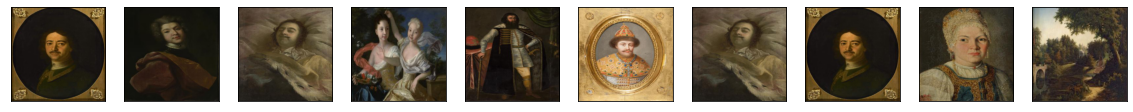

In [0]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
import random
seed = 42
random.seed = seed
np.random.seed = seed
X_train, X_test = train_test_split(X_train, test_size=20, random_state=seed)


**<h3> LAB color space </h3>**

- L: the lightness on a scale from 0 (black) to 100 (white), which in fact is a grayscale image — it is not exactly equal to converting RGB to grayscale, but it is close enough
- a: green-red color spectrum, with values ranging from -128 (green) to 127 (red)
- b: blue-yellow color spectrum, with values ranging from -128 (blue) to 127 (yellow)

**RGB** 

<img src="https://miro.medium.com/max/1400/1*5pq3eQEjrQ6SVyywQpsqNA.png" height="200"/>

**LAB**

<img src="https://miro.medium.com/max/1400/1*xWIPWK6GNylVSlcrmUMjww.png" height="200"/>

In [0]:
# Get data from kaggle 
import zipfile
# Download data
!kaggle datasets download -d valkling/inception-resnet-v2-weights

# UnZip data

zip_ref = zipfile.ZipFile("inception-resnet-v2-weights.zip", 'r')
zip_ref.extractall()

zip_ref.close()

 97% 193M/199M [00:03<00:00, 30.3MB/s]
100% 199M/199M [00:03<00:00, 55.2MB/s]


In [0]:
!ls

art-images-drawings-painting-sculpture-engraving.zip
autoencoder-1.png
autoencoder-2.png
dataset
inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5
inception-resnet-v2-weights.zip
kaggle.json
musemart
sample_data


In [0]:
inception = tf.keras.applications.InceptionResNetV2(weights=None, include_top=True)
inception.load_weights('inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5')
inception.graph = tf.compat.v1.get_default_graph()

In [0]:
embed_input = tf.keras.layers.Input(shape=(1000,))
#Encoder
encoder_input = tf.keras.layers.Input(shape=(256, 256, 1,))
encoder_output = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same',strides=1)(encoder_input)
encoder_output = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoder_output)
encoder_output = tf.keras.layers.Conv2D(128, (4,4), activation='relu', padding='same')(encoder_output)
encoder_output = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same',strides=1)(encoder_output)
encoder_output = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoder_output)
encoder_output = tf.keras.layers.Conv2D(256, (4,4), activation='relu', padding='same')(encoder_output)
encoder_output = tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same',strides=1)(encoder_output)
encoder_output = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoder_output)
encoder_output = tf.keras.layers.Conv2D(256, (4,4), activation='relu', padding='same')(encoder_output)
encoder_output = tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)

#Fusion
fusion_output = tf.keras.layers.RepeatVector(32 * 32)(embed_input) 
fusion_output = tf.keras.layers.Reshape(([32, 32, 1000]))(fusion_output)
fusion_output = tf.keras.layers.concatenate([encoder_output, fusion_output], axis=3) 
fusion_output = tf.keras.layers.Conv2D(256, (1, 1), activation='relu', padding='same')(fusion_output)

#Decoder
decoder_output = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(fusion_output)
decoder_output = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = tf.keras.layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = tf.keras.layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = tf.keras.layers.Conv2D(64, (4,4), activation='relu', padding='same')(decoder_output)
decoder_output = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = tf.keras.layers.Conv2D(32, (2,2), activation='relu', padding='same')(decoder_output)
decoder_output = tf.keras.layers.Conv2D(2, (3, 3), activation='tanh', padding='same')(decoder_output)
decoder_output = tf.keras.layers.UpSampling2D((2, 2))(decoder_output)

model = tf.keras.models.Model(inputs=[encoder_input, embed_input], outputs=decoder_output)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_210 (Conv2D)             (None, 256, 256, 128 1280        input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_7 (MaxPooling2D)  (None, 128, 128, 128 0           conv2d_210[0][0]                 
__________________________________________________________________________________________________
conv2d_211 (Conv2D)             (None, 128, 128, 128 262272      max_pooling2d_7[0][0]            
____________________________________________________________________________________________

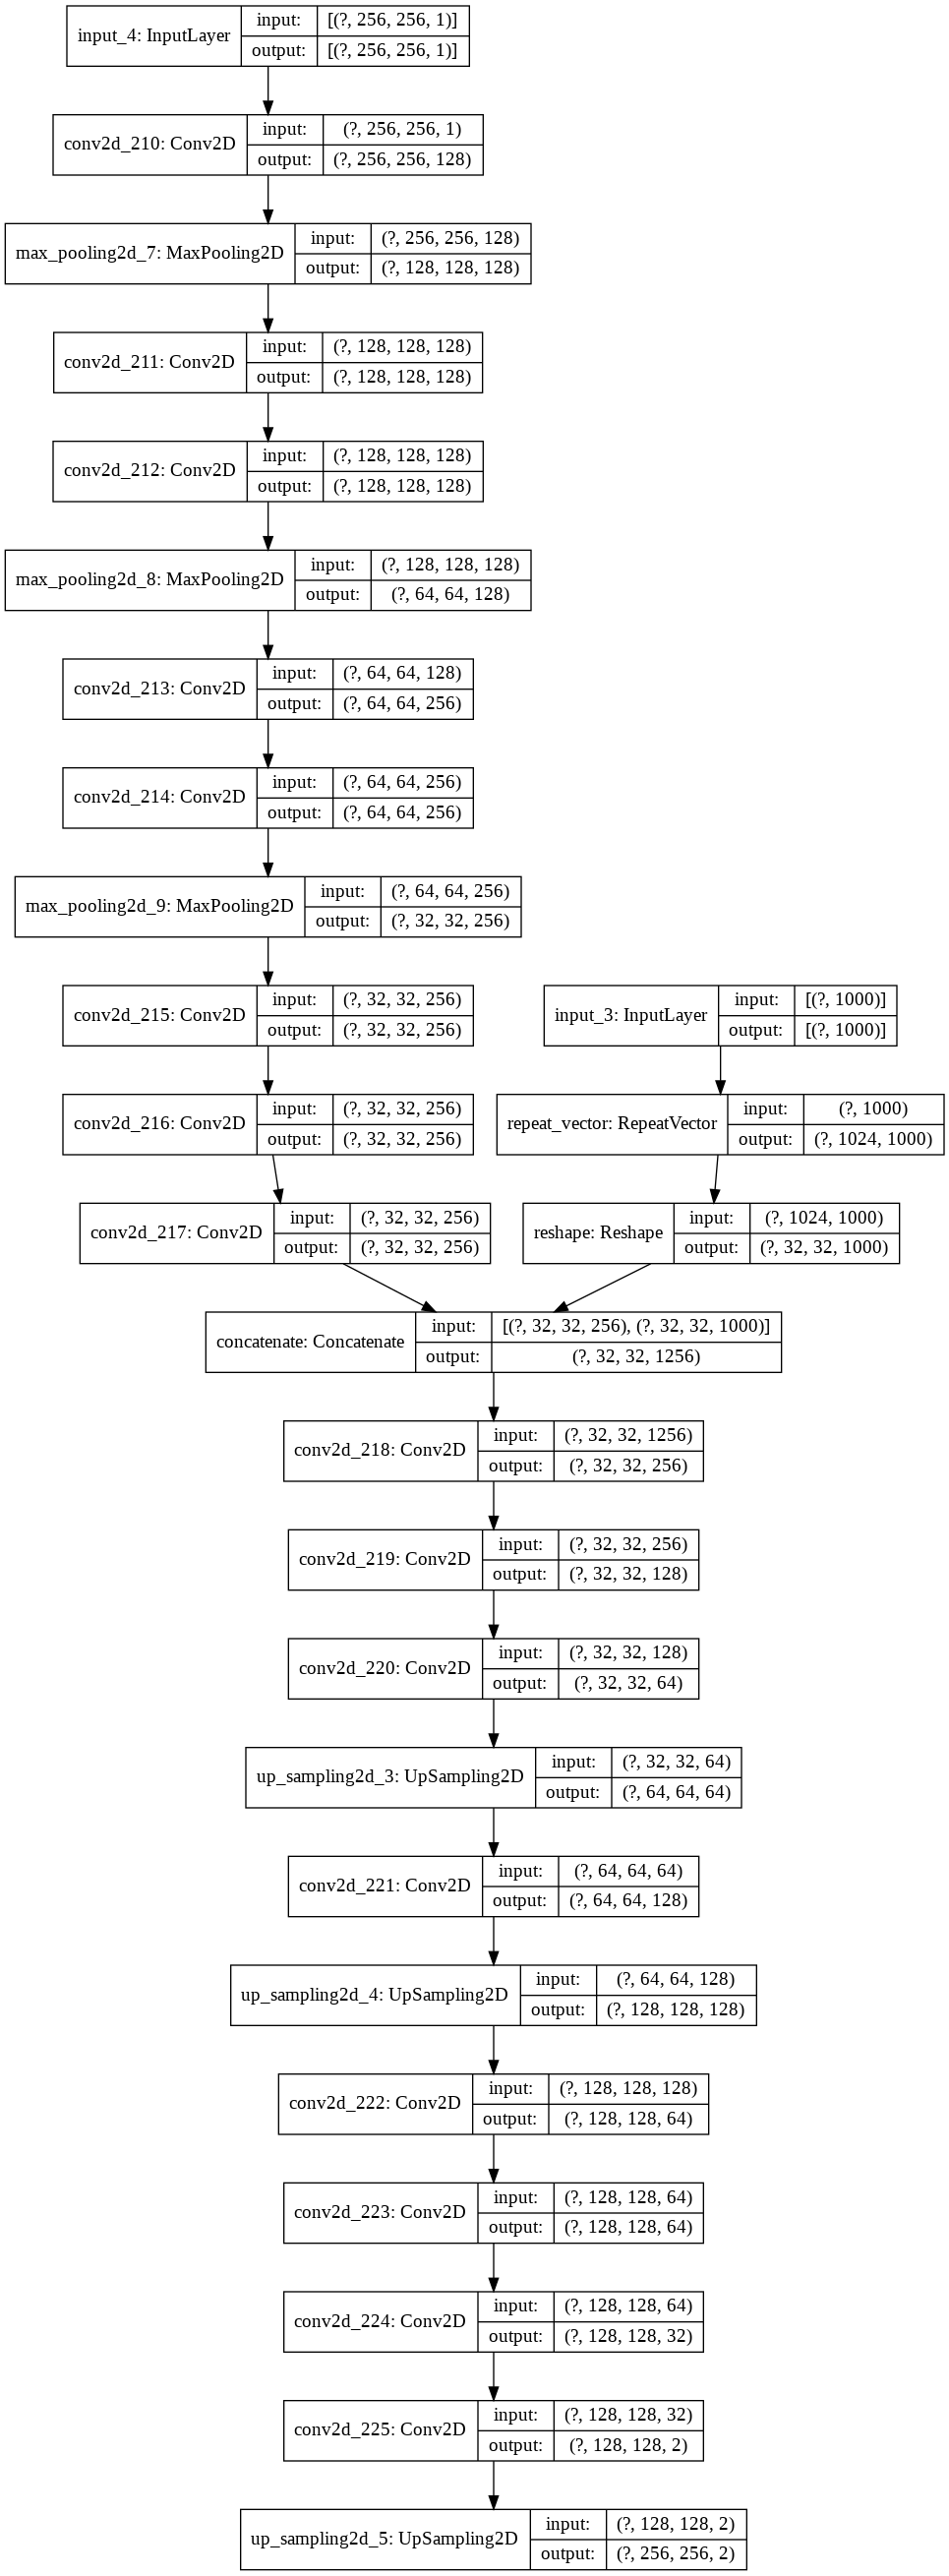

In [0]:
plot_model(model, to_file='image-color.png', show_shapes=True)

In [0]:
%%time
from skimage.color import rgb2gray, gray2rgb, rgb2lab, lab2rgb
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input
# Image transformer
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True)

#Create embedding
def create_inception_embedding(grayscaled_rgb):
    def resize_gray(x):
        return resize(x, (299, 299, 3), mode='constant')
    grayscaled_rgb_resized = np.array([resize_gray(x) for x in grayscaled_rgb])
    grayscaled_rgb_resized = preprocess_input(grayscaled_rgb_resized)
    embed = inception.predict(grayscaled_rgb_resized)
    return embed

#Generate training data
def image_a_b_gen(dataset=X_train, batch_size = 20):
    for batch in datagen.flow(dataset, batch_size=batch_size):
        X_batch = rgb2gray(batch)
        grayscaled_rgb = gray2rgb(X_batch)
        lab_batch = rgb2lab(batch)
        X_batch = lab_batch[:,:,:,0]
        X_batch = X_batch.reshape(X_batch.shape+(1,))
        Y_batch = lab_batch[:,:,:,1:] / 128
        yield [X_batch, create_inception_embedding(grayscaled_rgb)], Y_batch
        

CPU times: user 171 µs, sys: 0 ns, total: 171 µs
Wall time: 174 µs


In [0]:
from tensorflow.keras.callbacks import ReduceLROnPlateau 
from tensorflow.keras.callbacks import ModelCheckpoint 
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5,
                                            min_lr=0.00001)

filepath = "saved_Model.h5"
checkpoint = ModelCheckpoint(filepath,
                             save_best_only=True,
                             monitor='loss',
                             mode='min')

model_callbacks = [learning_rate_reduction,checkpoint]

In [0]:
%%time
BATCH_SIZE = 20
model.fit_generator(image_a_b_gen(X_train,BATCH_SIZE),
            epochs=30,
            verbose=1,
            steps_per_epoch=X_train.shape[0]/BATCH_SIZE,
             callbacks=model_callbacks
                   )

Epoch 1/30
102/101 [==============================] - 131s 1s/step - loss: 0.0058 - lr: 0.0010
Epoch 2/30
102/101 [==============================] - 129s 1s/step - loss: 0.0061 - lr: 0.0010
Epoch 3/30
102/101 [==============================] - 129s 1s/step - loss: 0.0052 - lr: 0.0010
Epoch 4/30
102/101 [==============================] - 129s 1s/step - loss: 0.0048 - lr: 0.0010
Epoch 5/30
102/101 [==============================] - 130s 1s/step - loss: 0.0048 - lr: 0.0010
Epoch 6/30
102/101 [==============================] - 129s 1s/step - loss: 0.0047 - lr: 0.0010
Epoch 7/30
102/101 [==============================] - 129s 1s/step - loss: 0.0046 - lr: 0.0010
Epoch 8/30
102/101 [==============================] - 129s 1s/step - loss: 0.0044 - lr: 0.0010
Epoch 9/30
102/101 [==============================] - 129s 1s/step - loss: 0.0044 - lr: 0.0010
Epoch 10/30
102/101 [==============================] - 130s 1s/step - loss: 0.0044 - lr: 0.0010
Epoch 11/30
102/101 [============================

In [0]:
import cv2
sample = X_test
color_me = gray2rgb(rgb2gray(sample))
color_me_embed = create_inception_embedding(color_me)
color_me = rgb2lab(color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))

output = model.predict([color_me, color_me_embed])
output = output * 128

decoded_imgs = np.zeros((len(output),256, 256, 3))

for i in range(len(output)):
    cur = np.zeros((256, 256, 3))
    cur[:,:,0] = color_me[i][:,:,0]
    cur[:,:,1:] = output[i]
    decoded_imgs[i] = lab2rgb(cur)
    cv2.imwrite("img_"+str(i)+".jpg", lab2rgb(cur))

/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 2 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


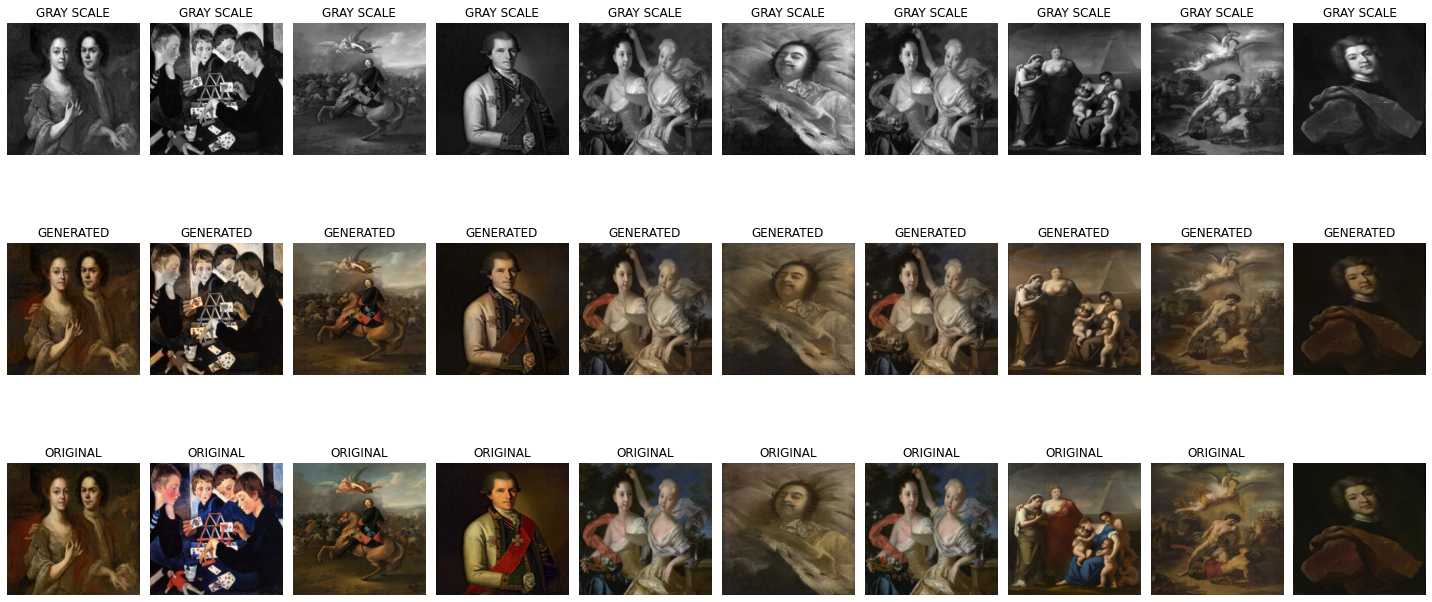

In [0]:
plt.figure(figsize=(20, 10))
for i in range(10):
    # grayscale
    plt.title("ORIGINAL")
    plt.subplot(3, 10, i + 1)
    plt.imshow(rgb2gray(X_test)[i].reshape(256, 256))
    plt.gray()
    plt.axis('off')
 
    # recolorization
    plt.title("GRAY SCALE")
    plt.subplot(3, 10, i + 1 +10)
    plt.imshow(decoded_imgs[i].reshape(256, 256,3))
    plt.axis('off')
    
    # original
    plt.title("GENERATED")
    plt.subplot(3, 10, i + 1 + 20)
    plt.imshow(X_test[i].reshape(256, 256,3))
    plt.axis('off')
 
plt.tight_layout()
plt.show()